# Part II - Flight Data Explanation
## by Timileyin Oladayo


## Investigation Overview


> The purpose of my investigation was to examine the delayed arrival of domestic flights in the United States during 2008. Specifically, I focused on two types of delays: Departure Delay and Elapsed Time Delay, which is the time lag between Actual Elapsed Time and the scheduled CRS Elapsed Time. This refers to the extra time that passengers had to spend on the airplane. My investigation aimed to analyze these delays in relation to four factors, which were CarrierDelay, WeatherDelay, NASDelay, and LateAircraftDelay, and identify the characteristics associated with long delays.


## Dataset Overview

> The dataset for this study comprises roughly 7 million records of domestic flights in the United States. These records contain information such as date, distance, arrival time, and various other features including delay factors. As part of my analysis, I excluded approximately 150,000 flight data points that were either canceled or diverted, as well as those originating or ending in Hawaii

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# load in the dataset into a pandas dataframe
df = pd.read_csv("2008.csv")

In [3]:
# data wrangling, removing diamonds with inconsistent or missing data.
df = df.copy()

df = df[(df.Cancelled==0) & (df.Diverted==0)]
df["delay_elapsed"] = df.ActualElapsedTime - df.CRSElapsedTime
df = df[ ~(df.index.isin([2486419,3698229])) ]
df = df[df.AirTime != 0]
df = df[(df.DepDelay > -120)]
hawaii = ["HNL", "OGG", "KOA"]
df = df[~df.isin(hawaii)]

df.shape[0]

2319110

In [4]:
# create dummy dataframe which are used to make plots.
# This dataframe which has 5 columns, delay type, delay time, DepDelay, delay_elapsed, distance
dummy = pd.DataFrame()
delay_types = ["NASDelay","LateAircraftDelay","CarrierDelay","WeatherDelay"]

for type in delay_types:
    dum = pd.DataFrame()
    dum["time"] = df[(df[type] != 0) & (~df[type].isnull())][type]
    dum["DepDelay"] = df[(df[type] != 0) & (~df[type].isnull())]["DepDelay"]
    dum["delay_elapsed"] = df[(df[type] != 0) & (~df[type].isnull())]["delay_elapsed"]
    dum["ArrDelay"] = df[(df[type] != 0) & (~df[type].isnull())]["ArrDelay"]
    dum["Distance"] = df[(df[type] != 0) & (~df[type].isnull())]["Distance"]
    dum["Delay Factor"] = type
    dummy = dummy.append(dum)
  
bin_edges1 = np.arange(0,600,200)
bin_edges2 = np.arange(0,2000,400)
dummy["elapsed_blocked"] = pd.cut(dummy.delay_elapsed, bin_edges1, right=False, include_lowest=True)
dummy["depdelay_blocked"] = pd.cut(dummy.DepDelay, bin_edges2, right=False, include_lowest=True)

#### DepartureTime-Delay / ElapsedTime-Delay Distribution

The arrival delay can be attributed to the distributions of two types of delay: Departure Delay and Elapsed Time Delay. Departure Delay was observed to have a right-skewed distribution and generally took higher values, while Elapsed Time Delay had a symmetric distribution and generally took lower values.

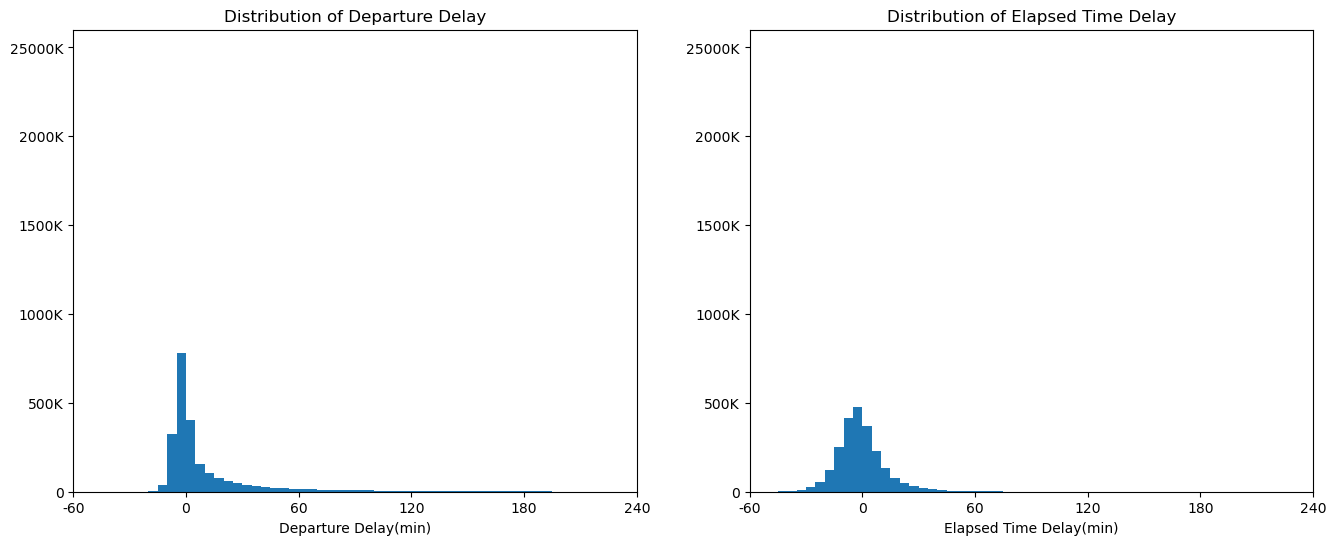

In [5]:
# plot the histgram again in the limit of [-50<x<200]
bin = np.arange(-100, 240, 5)
plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.hist(data=df, x="DepDelay",bins=bin)
plt.title("Distribution of Departure Delay")
plt.xlabel("Departure Delay(min)")
plt.xlim(-60,240)
plt.ylim(0,2600000)
plt.xticks(np.arange(-60,300,60),np.arange(-60,300,60))
plt.yticks(np.arange(0,3000000,500000),[0,"500K","1000K","1500K","2000K","25000K"]);

plt.subplot(1,2,2)
plt.hist(data=df, x="delay_elapsed",bins=bin)
plt.title("Distribution of Elapsed Time Delay")
plt.xlabel("Elapsed Time Delay(min)")
plt.xlim(-60,240)
plt.ylim(0,2600000)
plt.xticks(np.arange(-60,300,60),np.arange(-60,300,60))
plt.yticks(np.arange(0,3000000,500000),[0,"500K","1000K","1500K","2000K","25000K"]);

#### Arrival Delay Distribution

The dataset includes a wide range of values for arrival delay, with the majority falling within the range of approximately -60 to 240 minutes. Negative values indicate that the plane arrived earlier than scheduled. The mode of the distribution is located around 0 minutes, as one would expect.

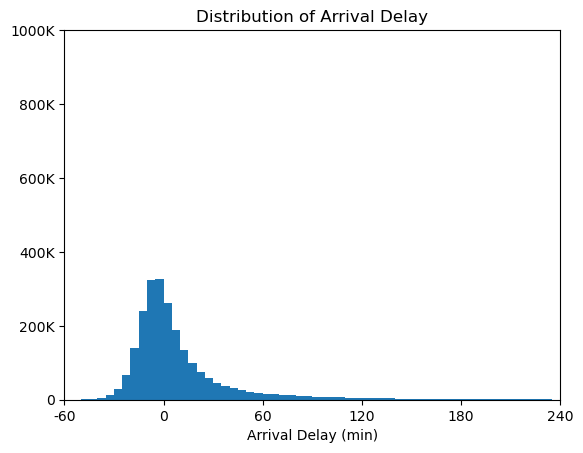

In [6]:
bin = np.arange(-100, 240, 5)
plt.hist(data=df, x="ArrDelay", bins=bin)
plt.title("Distribution of Arrival Delay")
plt.xlabel("Arrival Delay (min)")
plt.xlim(-60,240)
plt.xticks(np.arange(-60,300,60),np.arange(-60,300,60))
plt.yticks(np.arange(0,1200000,200000),[0,"200K","400K","600K","800K","1000K"]);

#### Relationship among DepDelay & ElapsedTimeDelay & ArrDelay?

The plot on the left illustrates the correlation between Departure Delay and Elapsed Time Delay, indicating that Departure Delay is typically much longer than Elapsed Time Delay. The plot in the middle demonstrates that Departure Delay has a significant impact on Arrival Delay. Meanwhile, the plot on the right shows that although Arrival Delay can increase as Elapsed Time Delay increases, this tendency is constrained because Elapsed Time Delay is limited to a range of less than 500.

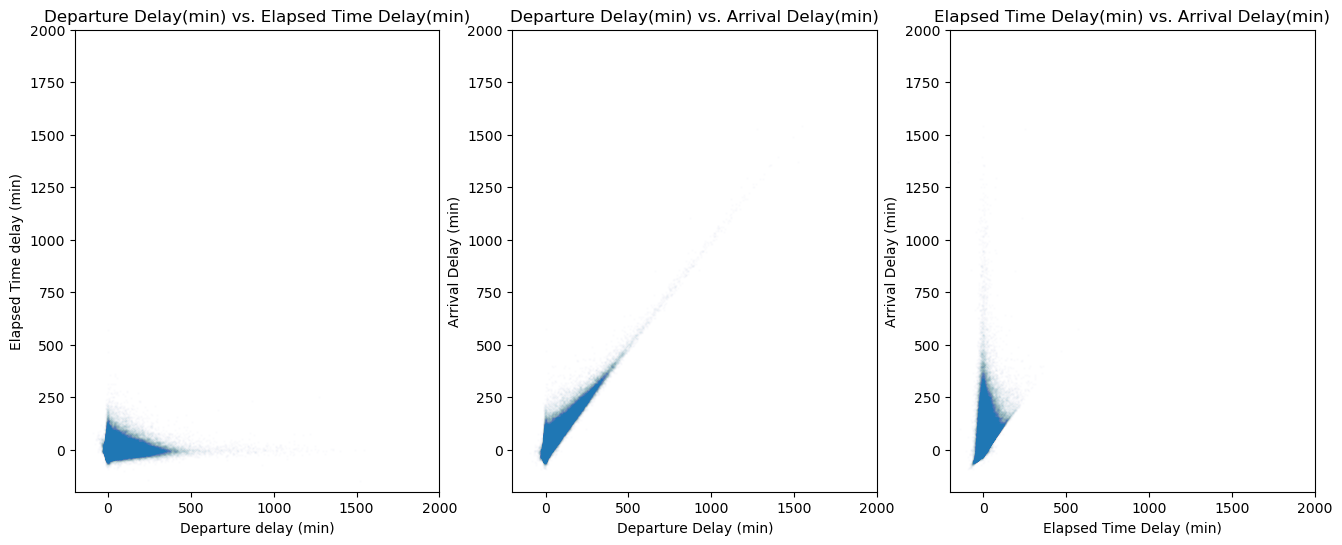

In [7]:
plt.figure(figsize=[16,6])

plt.subplot(1,3,1)
plt.title("Departure Delay(min) vs. Elapsed Time Delay(min)")
plt.scatter(data=df, x="DepDelay", y="delay_elapsed", s=0.5, alpha=0.01)
plt.xlabel("Departure delay (min)")
plt.ylabel("Elapsed Time delay (min)");
plt.xlim([-200,2000])
plt.ylim([-200,2000]);

plt.subplot(1,3,2)
plt.title("Departure Delay(min) vs. Arrival Delay(min)")
plt.scatter(data=df, x="DepDelay", y="ArrDelay", s=0.5, alpha=0.01)
plt.xlabel("Departure Delay (min)")
plt.ylabel("Arrival Delay (min)")
plt.xlim([-200,2000])
plt.ylim([-200,2000]);

plt.subplot(1,3,3)
plt.title("Elapsed Time Delay(min) vs. Arrival Delay(min)")
plt.scatter(data=df, x="delay_elapsed", y="ArrDelay", s=0.5, alpha=0.01)
plt.xlabel("Elapsed Time Delay (min)")
plt.ylabel("Arrival Delay (min)")
plt.xlim([-200,2000])
plt.ylim([-200,2000]);

#### What is the relationship of (Distance) vs. (ArrDelay/DepDelay/ElapsedTimeDelay)?

> The plots presented in this section indicate an intriguing observation: there is no correlation between long distance and extended delays.

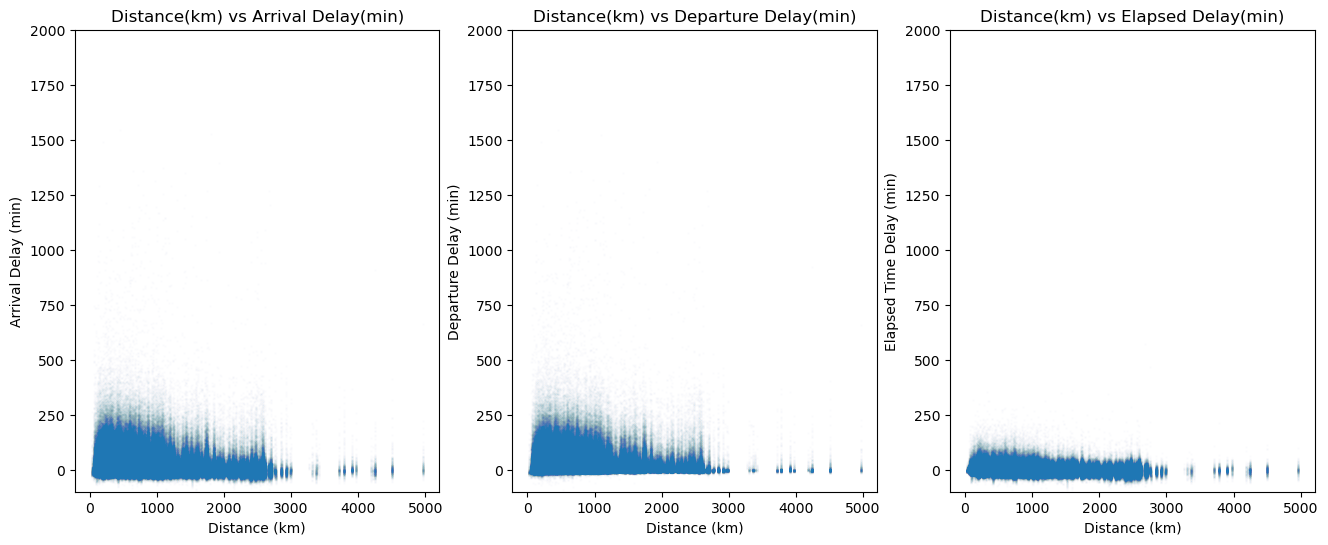

In [8]:
plt.figure(figsize=[16,6])

plt.subplot(1,3,1)
plt.title("Distance(km) vs Arrival Delay(min)")
plt.scatter(data=df, x="Distance", y="ArrDelay", s=0.5, alpha=0.01)
plt.xlabel("Distance (km)")
plt.ylabel("Arrival Delay (min)")
plt.ylim([-100,2000]);

plt.subplot(1,3,2)
plt.title("Distance(km) vs Departure Delay(min)")
plt.scatter(data=df, x="Distance", y="DepDelay", s=0.5, alpha=0.01)
plt.xlabel("Distance (km)")
plt.ylabel("Departure Delay (min)")
plt.ylim([-100,2000]);

plt.subplot(1,3,3)
plt.title("Distance(km) vs Elapsed Delay(min)")
plt.scatter(data=df, x="Distance", y="delay_elapsed", s=0.5, alpha=0.01)
plt.xlabel("Distance (km)")
plt.ylabel("Elapsed Time Delay (min)")
plt.ylim([-100,2000]);

#### How are each of 4 Delay Factors distributed according to the Length of DepartureDelay?


> By clustering Departure Delay times into four levels and analyzing the distribution of four delay factors, I created visualizations that revealed a correlation between longer Departure Delay times and longer CarrierDelay and WeatherDelay times.

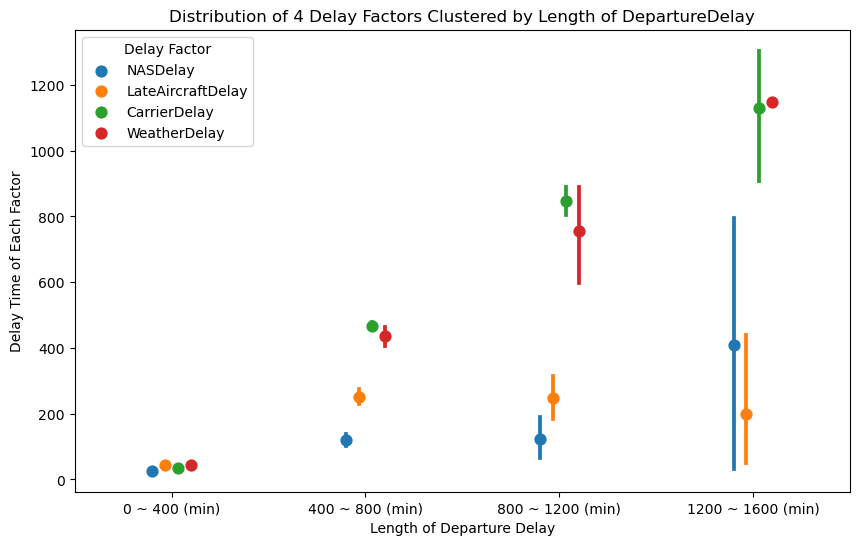

In [9]:
plt.figure(figsize=[10,6])
sb.pointplot(data=dummy, hue="Delay Factor", y="time", x="depdelay_blocked", linestyles="", dodge=0.2)
plt.title("Distribution of 4 Delay Factors Clustered by Length of DepartureDelay")
plt.xlabel("Length of Departure Delay")
plt.ylabel("Delay Time of Each Factor")
plt.xticks([0,1,2,3],["0 ~ 400 (min)","400 ~ 800 (min)", "800 ~ 1200 (min)","1200 ~ 1600 (min)"]);

#### What is the distribution of each of the four Delay Factors based on the duration of ElapsedTimeDelay?

> When the plot was recreated using two levels of ElapsedTimeDelay instead of DepartureDelay, it was observed that only the NAS Delay factor exhibited a correlation with longer DepartureDelay times.


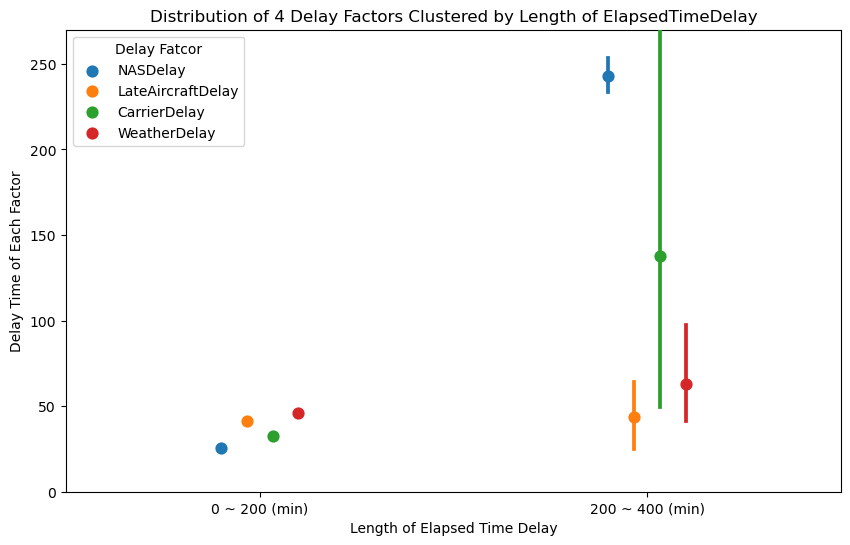

In [10]:
plt.figure(figsize=[10,6])
sb.pointplot(data=dummy, hue="Delay Factor", y="time", x="elapsed_blocked", linestyles="", dodge=0.2)
plt.title("Distribution of 4 Delay Factors Clustered by Length of ElapsedTimeDelay")
plt.xlabel("Length of Elapsed Time Delay")
plt.ylabel("Delay Time of Each Factor")
plt.legend(title="Delay Fatcor", loc='upper left')
plt.xticks([0,1],["0 ~ 200 (min)","200 ~ 400 (min)"])
plt.ylim([0,270]);

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_explanation.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 